# Assignment Task 1
<p>Apply Bayes' Theorem to solve a medical diagnosis problem given conditional probabilities.</p>

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("../data/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

In [6]:
dataset.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
M = dataset[dataset.diagnosis == "M"]

In [8]:
M.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
B = dataset[dataset.diagnosis == "B"]

In [10]:
B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [11]:
import matplotlib.pyplot as plt

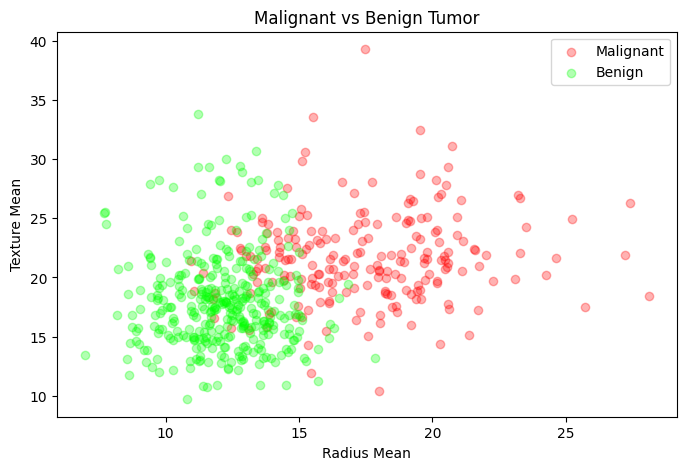

In [16]:
plt.figure(figsize=(8,5))
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [17]:
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]

In [18]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [19]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [23]:
nb.fit(x_train, y_train)

GaussianNB()

In [24]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9415204678362573


# Assignment Task 2
<p>Find the eigenvalues and corresponding eigenvectors of a given matrix <br>
let matxix  </p>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mi>A</mi><mo>=</mo><mrow><mo fence="true">[</mo><mtable rowspacing="0.16em" columnalign="center center center" columnspacing="1em"><mtr><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>1</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>4</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>7</mn></mstyle></mtd></mtr><mtr><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>2</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>5</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>8</mn></mstyle></mtd></mtr><mtr><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>3</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>6</mn></mstyle></mtd><mtd><mstyle scriptlevel="0" displaystyle="false"><mn>9</mn></mstyle></mtd></mtr></mtable><mo fence="true">]</mo></mrow></mrow><annotation encoding="application/x-tex">A = \begin{bmatrix}
1 &amp; 4 &amp; 7 \\
2 &amp; 5 &amp; 8 \\
3 &amp; 6 &amp; 9
\end{bmatrix}
</annotation></semantics></math>


In [25]:
import numpy as np

In [27]:
A = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])
print("Matrix A:")
print(A)

Matrix A:
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [28]:
# Eigenvalues and Eigenvectors
def eigen(matrix):
    return np.linalg.eig(matrix)


In [29]:
# Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = eigen(A)
print("\nEigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


Eigenvalues:
[ 1.61168440e+01 -1.11684397e+00 -1.57673427e-16]
Eigenvectors:
[[-0.46454727 -0.88290596  0.40824829]
 [-0.57079553 -0.23952042 -0.81649658]
 [-0.67704379  0.40386512  0.40824829]]


# Assignment Task - 3

In [31]:
import numpy as np

# Define your 3x3 matrix
matrix = np.array([[3, 4, 2],
              [8, 3, 5],
              [6, 6, 7]])

# Calculate the determinant
det = np.linalg.det(matrix)
print(f"Determinant of the matrix: {det}")


Determinant of the matrix: -70.99999999999994


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mo>=</mo><mfrac><mn>1</mn><mrow><mtext>det</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">)</mo></mrow></mfrac><mo>⋅</mo><mtext>adj</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">A^{-1} = \frac{1}{\text{det}(A)} \cdot \text{adj}(A) 
</annotation></semantics></math>

In [32]:
# Calculate the inverse (if det != 0)
if det != 0:
    inverse_matrix = np.linalg.inv(matrix)
    print("Inverse of the matrix:")
    print(inverse_matrix)
else:
    print("Matrix is not invertible (determinant is zero).")


Inverse of the matrix:
[[ 0.12676056  0.22535211 -0.1971831 ]
 [ 0.36619718 -0.12676056 -0.01408451]
 [-0.42253521 -0.08450704  0.32394366]]


# Assignment Task-4
<p>Describe the properties and applications of the Normal distribution and calculate probabilities using its properties</p>

**1. Properties of the Normal Distribution:**<br>
<ul> 
<li><b>Symmetry:</b></li>The Normal distribution (also known as the Gaussian distribution or bell curve) is symmetric around its mean. When plotted on a graph, it forms a bell-shaped curve, with most values clustering around the central region and tapering off as they move further away from the mean.
<li><b>Mean, Median, and Mode:</b></li>In a Normal distribution, the mean, median, and mode are exactly the same. They coincide at the center of the curve.

<li><b>Standard Deviation:</b></li>The standard deviation determines the spread of the distribution. A smaller standard deviation results in a narrower curve, while a larger one leads to a wider curve.

**2. Applications of the Normal Distribution:**
<ul>
<li><b>Statistics:</b></li>Normal distributions are fundamental in statistics. Many statistical tests assume normality, making them applicable to various fields.
<li><b>Finance:</b></li>Stock prices, interest rates, and investment returns often follow a Normal distribution.
<li><b>Quality Control:</b></li>The Normal distribution models process variations and defects.
<li><b>Natural Sciences:</b></li>Phenomena like particle velocities, reaction times, and measurement errors can be approximated by Normal distributions.
<li><b>Social Sciences:</b></li>Variables such as IQ scores, heights, and test scores tend to be normally distributed.
</ul>